In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import math
import numpy as np
import pandas as pd
import torch
from torch.nn.functional import softplus
import pyro
from pyro.distributions import Binomial, Multinomial, Bernoulli, Beta
from pyro.infer import EmpiricalMarginal, Importance
from pyro.infer.abstract_infer import TracePredictive
from pyro.distributions.util import log_sum_exp

In [2]:
num_imp_samples = 100000
num_marg_samples = 100000

In [3]:
def rep_code(N):
    s = pyro.sample('s', Bernoulli(torch.tensor(0.5)))
    f = torch.tensor(0.1)
    if s.item() == 0:
        return pyro.sample('r', Binomial(N, f))
    else:
        return pyro.sample('r', Binomial(N,1 - f))

In [4]:
conditioned_rep_code = pyro.condition(rep_code, data={'s': torch.tensor(0.)})
likelihood = Importance(conditioned_rep_code, num_samples=num_imp_samples)
marginal = EmpiricalMarginal(likelihood.run(3))
marginal_samp = [marginal().item() for _ in range(num_marg_samples)]

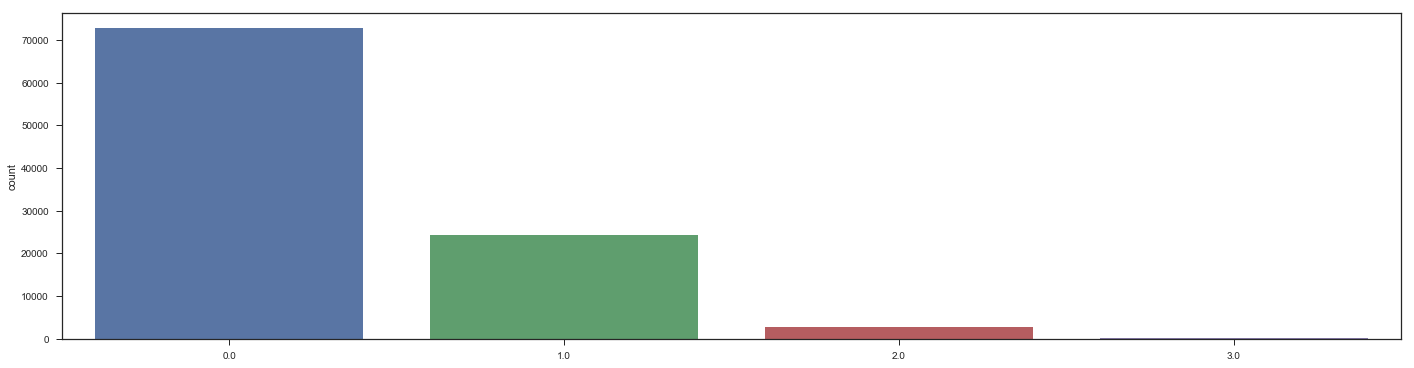

In [5]:
fig, ax = plt.subplots(figsize=(24,6))
sns.countplot(marginal_samp, ax=ax)

In [6]:
df = pd.DataFrame({ 'trial': marginal_samp })
# should be approx 0.729
p_0_bits_flipped = len(df.query('trial == 0')) / num_marg_samples

# should be approx 0.081 * 3 = 0.243
p_1_bits_flipped = len(df.query('trial == 1')) / num_marg_samples

# should be approx 0.009 * 3 = 0.027
p_2_bits_flipped = len(df.query('trial == 2')) / num_marg_samples

# should be approx 0.001
p_3_bits_flipped = len(df.query('trial == 3')) / num_marg_samples

# should be approx .97
prob_correct = p_0_bits_flipped + p_1_bits_flipped

# should be approx .03
prob_incorrect = p_2_bits_flipped + p_3_bits_flipped

In [7]:
print('P(r has 0 bits flipped | s = 0) = {}'.format(p_0_bits_flipped))
print('P(r has 1 bits flipped | s = 0) = {}'.format(p_1_bits_flipped))
print('P(r has 2 bits flipped | s = 0) = {}'.format(p_2_bits_flipped))
print('P(r has 3 bits flipped | s = 0) = {}'.format(p_3_bits_flipped))
print('P(r correct decode | s = 0) = {}'.format(prob_correct))
print('P(r incorrect decode | s = 0) = {}'.format(prob_incorrect))

P(r has 0 bits flipped | s = 0) = 0.72776
P(r has 1 bits flipped | s = 0) = 0.24398
P(r has 2 bits flipped | s = 0) = 0.02726
P(r has 3 bits flipped | s = 0) = 0.001
P(r correct decode | s = 0) = 0.9717399999999999
P(r incorrect decode | s = 0) = 0.02826
